<a href="https://colab.research.google.com/github/Navyashreekulal2000/My-New-Project/blob/main/Final_Early_Detection_of_Gaming_Addiction_in_BGMI_Players.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Name Of The Project: Early Detection of Gaming Addiction in BGMI Players**

**Import Libraries**




In [1]:
#importing libraries for doing this project
import numpy as np #It is used for to Performs efficiant Numerical Computation and work with Multi-dimensional Array in Phython
import pandas as pd #It is used for easy Manipulation Analysis and handling Stuctured Data
import matplotlib.pyplot as plt #It is used for creating static, interactive, and animated visualizations like line charts, bar charts, and more.
import seaborn as sns #Seaborn is a Python library built on Matplotlib, used for creating attractive and informative statistical visualizations
%matplotlib inline
import warnings # Optional It  is used to display, filter, or ignore warning messages that don't halt program execution but may indicate potential issues.
warnings.filterwarnings('ignore') #is used to suppress all warning messages in Python, preventing them from being displayed during program execution.

In [2]:
#It reads a CSV file from the specified Google Drive path into a Pandas DataFrame named data.
data = pd.read_csv('/content/drive/MyDrive/ML PROJECT/bgmi projects.csv')

In [3]:
#display the first five rows in the DataFrame.
data.head()

,Bgmi_id,Age,Occupation,In_game_Purchases,days_played,kd,Tire_state,Addicted
0,1,29,Unemployed,456.10,24.99,2.79,Intermediate,1
1,2,37,Professional,437.27,92.29,3.46,Beginner,0
2,3,28,Student,77.46,263.78,1.96,Expert,1
3,4,34,Student,449.08,345.13,1.48,Intermediate,0
4,5,34,Professional,313.92,198.21,2.45,Expert,1


In [4]:
# information of dataframe(understanding the structure of your data, identifying missing values, and verifying that the data types )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Bgmi_id            5110 non-null   int64  
 1   Age                5110 non-null   int64  
 2   Occupation         5110 non-null   object 
 3   In_game_Purchases  5110 non-null   float64
 4   days_played        5110 non-null   float64
 5   kd                 4373 non-null   float64
 6   Tire_state         5110 non-null   object 
 7   Addicted           5110 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 319.5+ KB


In [5]:
# stats behind our dataframe
data.describe()
#Count: Number of non-null values
#Mean: Average of the values
#Standard deviation (std): Measure of spread
#Minimum (min) and Maximum (max): Range of the data
#25th, 50th (median), and 75th percentiles: Quartiles

,Bgmi_id,Age,In_game_Purchases,days_played,kd,Addicted
count,5110.000000,5110.000000,5110.000000,5110.000000,4373.000000,5110.000000
mean,2555.500000,26.093151,251.157462,182.519194,2.512342,0.052250
std,1475.274268,8.346054,143.685882,104.312748,1.446900,0.222554
min,1.000000,12.000000,0.000000,1.020000,0.000000,0.000000
25%,1278.250000,19.000000,128.980000,94.412500,1.240000,0.000000
50%,2555.500000,26.000000,252.925000,180.265000,2.540000,0.000000
75%,3832.750000,33.000000,376.262500,272.652500,3.790000,0.000000
max,5110.000000,40.000000,499.880000,364.980000,5.000000,1.000000


In [6]:
# stats behind our dataframe including "object" datatype
data.describe(include='object')
#Count: Number of non-null values
#Unique: Number of unique categories
#Top: Most frequent category (mode)
#Freq: Frequency of the top category

,Occupation,Tire_state
count,5110,5110
unique,3,3
top,Student,Expert
freq,1792,1718


In [7]:
data['Occupation'].value_counts() #it returns the count of unique values of Occupation columns

,count
Occupation,
Student,1792
Unemployed,1716
Professional,1602


In [8]:
data['Tire_state'].value_counts() #it returns the count of unique values of Tire States columns

,count
Tire_state,
Expert,1718
Beginner,1708
Intermediate,1684


In [9]:
# check the null values in dataframe
data.isna().sum()

,0
Bgmi_id,0
Age,0
Occupation,0
In_game_Purchases,0
days_played,0
kd,737
Tire_state,0
Addicted,0


In [10]:
'''Remove 'Bgmi_id' columns bcz this is not really useful for our model, and if we
don't remove it our model consider it as real value and make wrong predictions.'''

data.drop('Bgmi_id',axis=1,inplace=True)

In [11]:
data.head() #display the first five rows in the DataFrame.

,Age,Occupation,In_game_Purchases,days_played,kd,Tire_state,Addicted
0,29,Unemployed,456.10,24.99,2.79,Intermediate,1
1,37,Professional,437.27,92.29,3.46,Beginner,0
2,28,Student,77.46,263.78,1.96,Expert,1
3,34,Student,449.08,345.13,1.48,Intermediate,0
4,34,Professional,313.92,198.21,2.45,Expert,1


In [12]:
# Remove null values in 'kd' column
data.dropna(axis=0,inplace=True)

In [13]:
data.info() # information of dataframe(understanding the structure of your data, identifying missing values, and verifying that the data types )

<class 'pandas.core.frame.DataFrame'>
Index: 4373 entries, 0 to 5109
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                4373 non-null   int64  
 1   Occupation         4373 non-null   object 
 2   In_game_Purchases  4373 non-null   float64
 3   days_played        4373 non-null   float64
 4   kd                 4373 non-null   float64
 5   Tire_state         4373 non-null   object 
 6   Addicted           4373 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 273.3+ KB


In [14]:
# exploring dataframe using group by of 'occupation' column
Occupation_gb = data.groupby('Occupation')

In [15]:
# Calculate the mean of only numerical columns
Occupation_gb.mean(numeric_only=True)

,Age,In_game_Purchases,days_played,kd,Addicted
Occupation,,,,,
Professional,26.154753,252.618091,186.036433,2.494097,0.031688
Student,26.228836,252.918373,179.787870,2.529550,0.066138
Unemployed,26.055851,243.180293,181.478025,2.511503,0.059840


In [16]:
# exploring dataframe using group by of 'Tire_state' column
Tire_state_gb = data.groupby('Tire_state')

In [17]:
# Calculate the mean of only numerical columns
Tire_state_gb.mean(numeric_only=True)

,Age,In_game_Purchases,days_played,kd,Addicted
Tire_state,,,,,
Beginner,26.362129,247.057519,178.559337,2.550608,0.007602
Expert,26.057796,253.689133,184.118871,2.478602,0.133065
Intermediate,26.020862,247.549951,184.206822,2.508748,0.016690


**Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) is a critical step in data analysis that involves summarizing the main characteristics of a dataset, often using visualizations and statistics, to uncover patterns, identify anomalies, and gain insights before applying machine learning models.

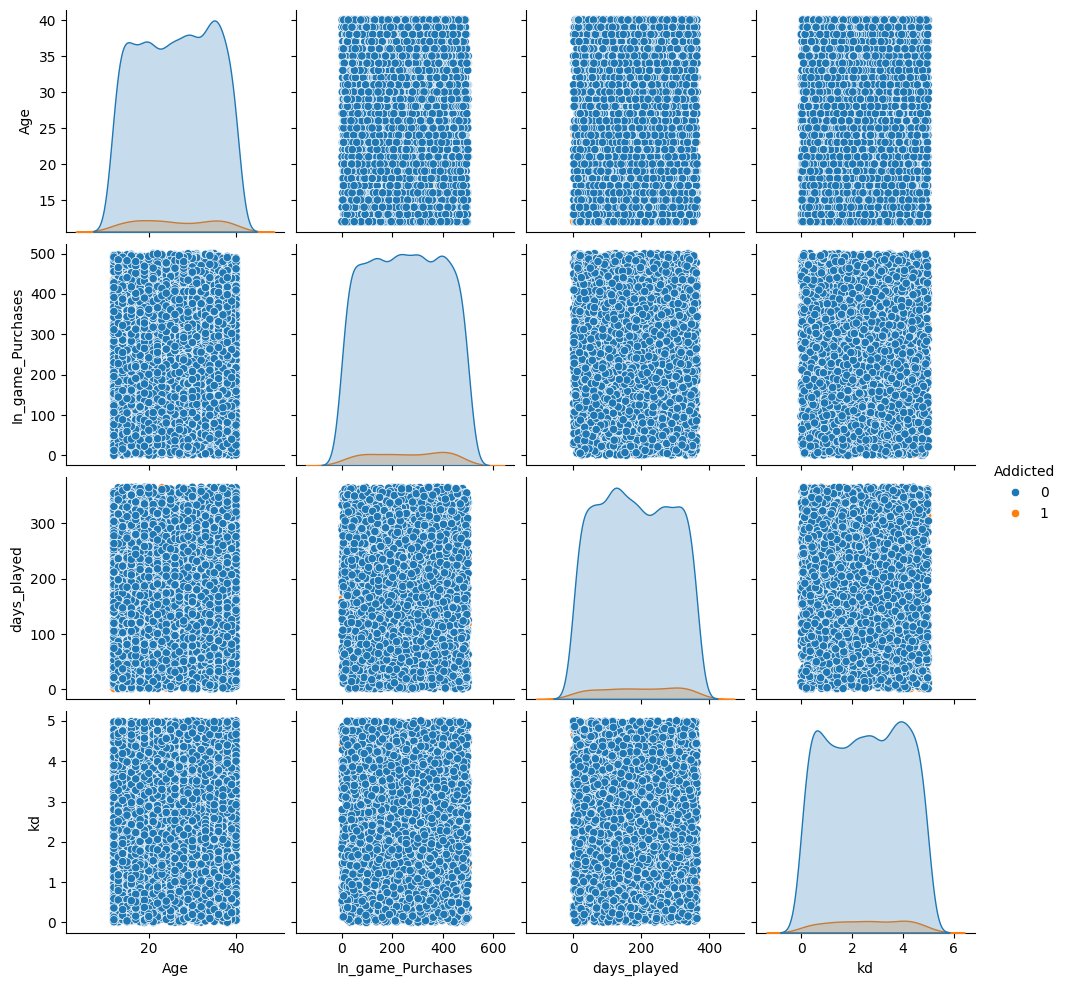

In [18]:
# let's create a lazy plot called pairplot for normal analysis of complete dataset
sns.pairplot(data,hue='Addicted')

**Univate Analysis**

Univariate analysis involves examining each variable in a dataset individually to summarize its characteristics and understand its distribution


```
Summary Statistics: Using functions like data.describe() for numerical variables and data['column'].value_counts() for categorical variables to get an overview.

Histograms: Visualizing the distribution of numerical variables to understand their frequency distribution.

Box Plots: Identifying outliers and understanding the spread of numerical data.

Bar Charts: Visualizing the counts of categories for categorical variables.

Pie Charts: Showing the proportion of each category in a categorical variable (though less commonly used in data science).
```



Text(0.5, 1.02, 'Feature Distribution')

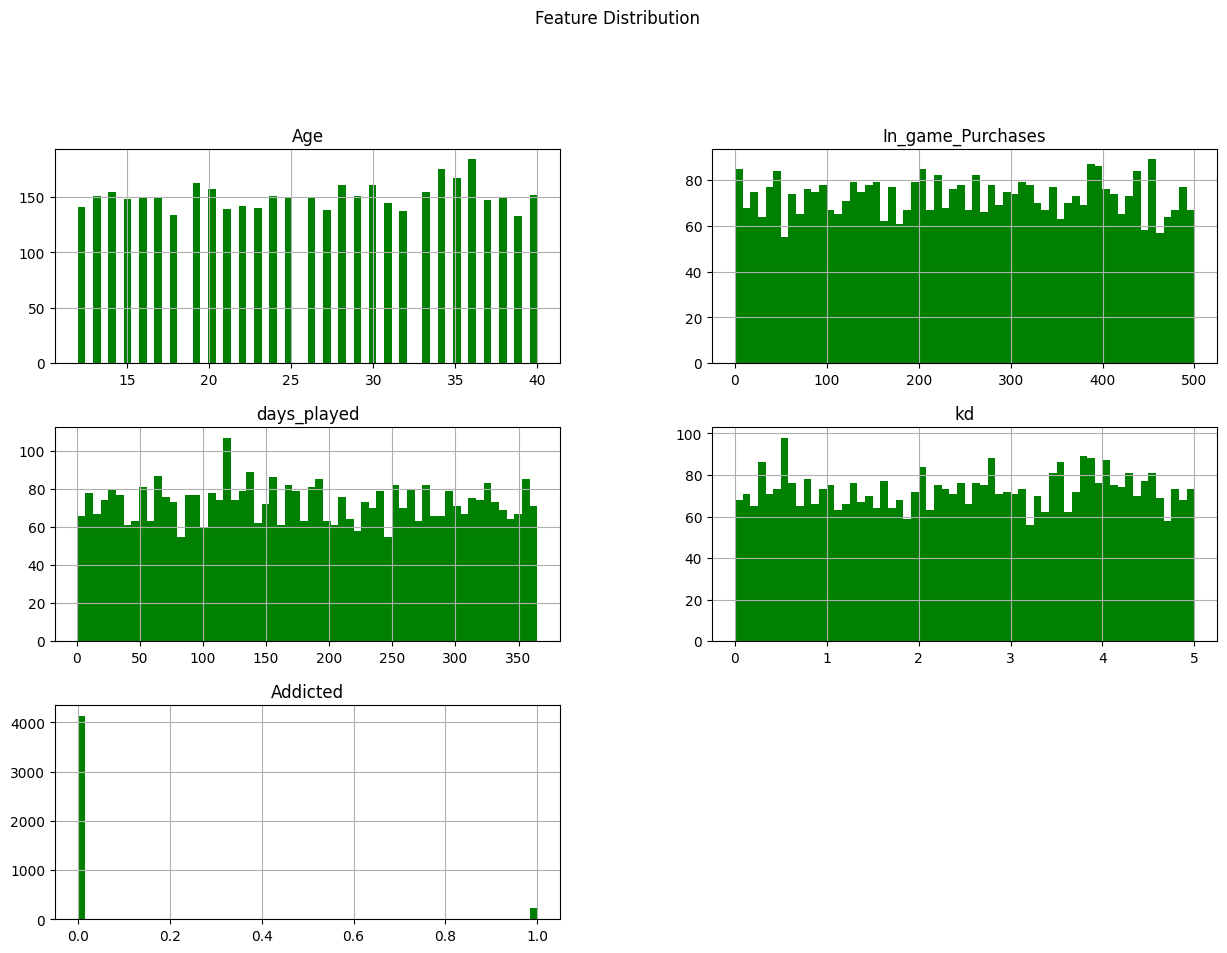

In [19]:
# check the distribution of dataset features
data.hist(bins=60,figsize=(15,10),color='green')
plt.suptitle('Feature Distribution',x=0.5,y=1.02,ha='center',fontsize='large')

Text(0.5, 1.02, 'Feature Distribution')

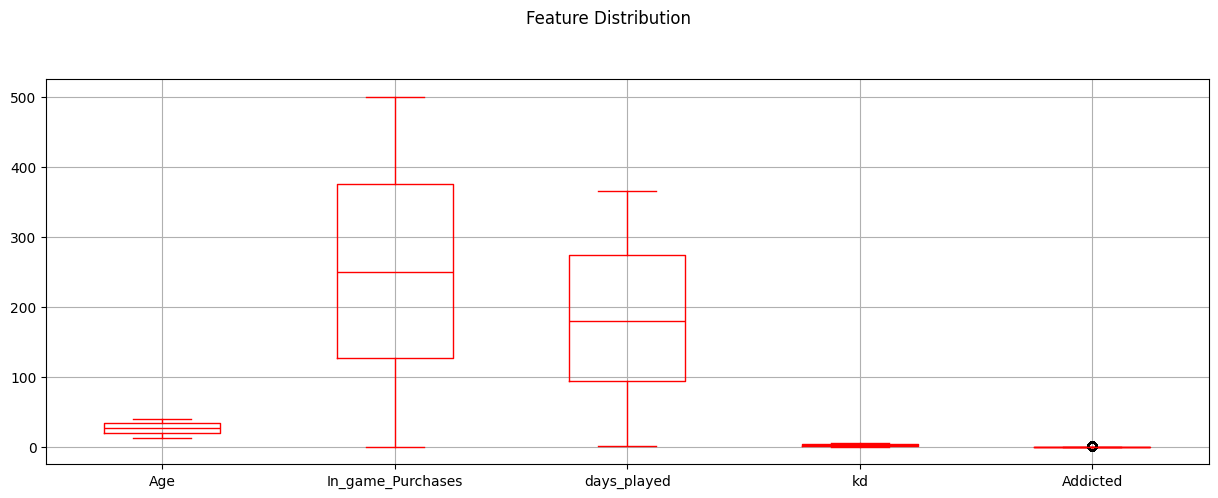

In [20]:
# check the distribution of dataset features using barplot
data.boxplot(figsize=(15,5),color='red')
plt.suptitle('Feature Distribution',x=0.5,y=1.02,ha='center',fontsize='large')

In [21]:
# list for the occupation column
Occupation = ['Professional','Student','Unemployeed']

In [22]:
# make an object which store value count of the elements in occupation column
Occupation_data = pd.Series(data['Occupation']).value_counts()

In [23]:
# adjust size of the pie chart
plt.figure(figsize=(6,4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

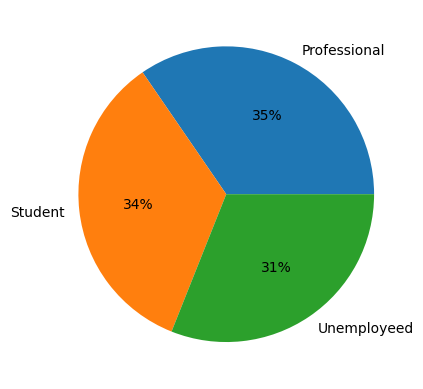

In [24]:
# ploting pie chart
plt.pie(Occupation_data,labels=Occupation,autopct='%.0f%%')
plt.show()

In [25]:
# list for the Tire_state column
Tire_state = ['Beginer','Intermediate','Expert']

In [26]:
# make an object which store value count of the elements in Tire_state column
Tire_state_data = pd.Series(data['Tire_state']).value_counts()

In [27]:
# adjust size of the pie chart
plt.figure(figsize=(6,4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

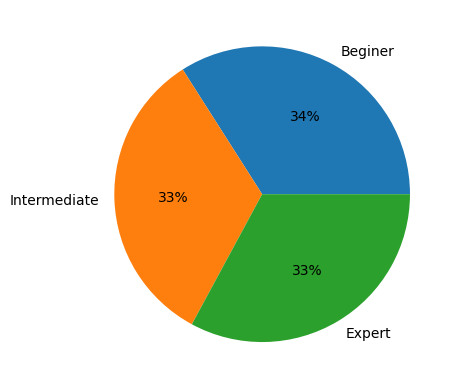

In [28]:
# ploting pie chart
plt.pie(Tire_state_data,labels=Tire_state,autopct='%.0f%%')
plt.show()

In [29]:
# let's see the distribution of real numbers columns with the help of kde plot
plt.figure(figsize=(15,15))

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

Text(0.5, 1.0, 'Age Of Gamers')

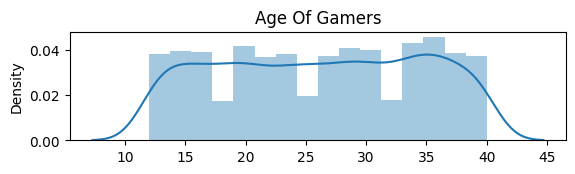

In [30]:
plt.subplot(3,1,1)
sns.distplot(x=data['Age'],kde=True)
plt.title('Age Of Gamers')

Text(0.5, 1.0, 'Number Of Days Gamers Played BGMI')

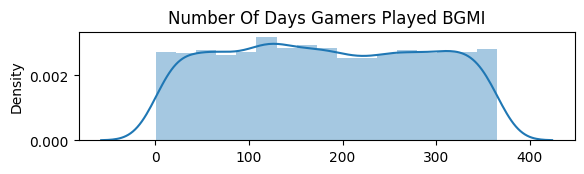

In [31]:
plt.subplot(3,1,2)
sns.distplot(x=data['days_played'],kde=True)
plt.title('Number Of Days Gamers Played BGMI')

Text(0.5, 1.0, 'Kill/Death Ratio')

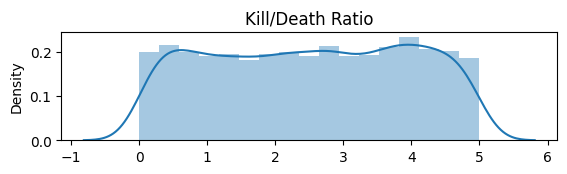

In [32]:
plt.subplot(3,1,3)
sns.distplot(x=data['kd'],kde=True)
plt.title('Kill/Death Ratio')

<Axes: xlabel='Occupation', ylabel='count'>

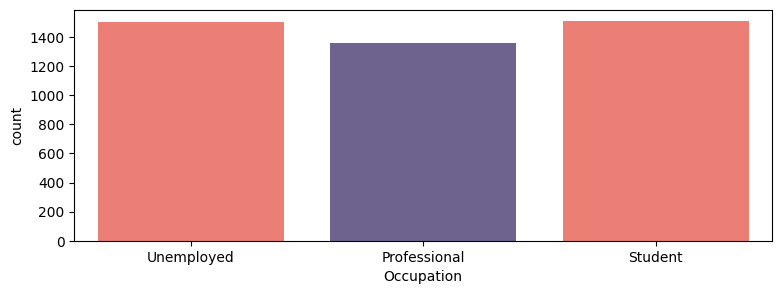

In [33]:
# create a countplot for Work Type column
plt.figure(figsize=(9,3))
sns.countplot(x='Occupation',data=data,palette=['#FF6F61', '#6B5B95'])

<Axes: xlabel='Tire_state', ylabel='count'>

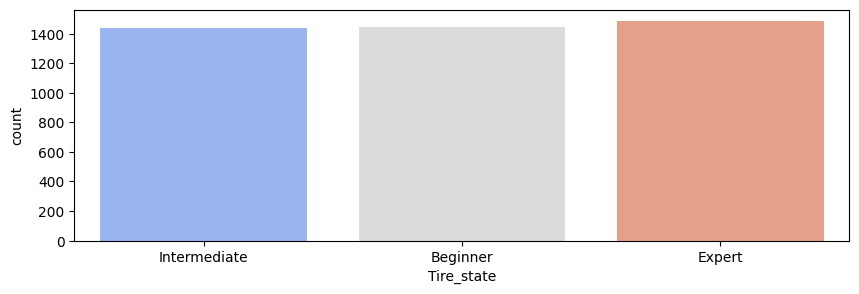

In [34]:
# create a countplot for Tire Status column
plt.figure(figsize=(10,3))
sns.countplot(x='Tire_state',data=data,palette="coolwarm")

<Axes: xlabel='Addicted', ylabel='count'>

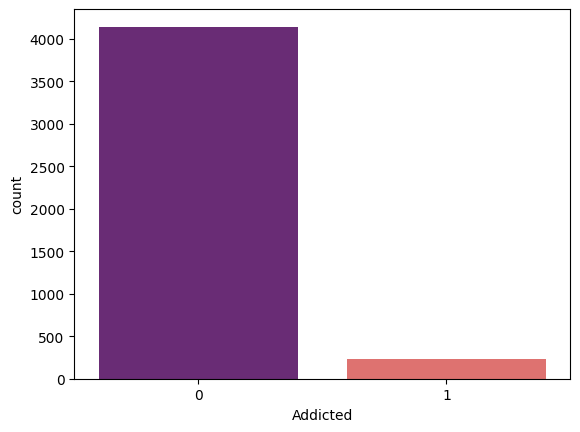

In [35]:
# create a countplot for target variable 'Addicted' column
sns.countplot(x='Addicted',data=data,palette='magma')

**Bivariate Analysis**

Bivariate analysis involves examining the relationship between two variables to understand how they interact or correlate with each other. This analysis helps identify patterns, associations, and potential causations. Common techniques for bivariate analysis include:


```
Scatter Plots: Visualizing the relationship between two numerical variables to identify trends or correlations.

Correlation Coefficient: Calculating metrics like Pearson's or Spearman's correlation coefficients to quantify the strength and direction of the relationship.

Box Plots by Group: Comparing the distribution of a numerical variable across different categories of a categorical variable.

Grouped Bar Charts: Comparing the means or counts of a numerical variable across different categories of a categorical variable.

Heatmaps: Visualizing the correlation matrix to see relationships between multiple pairs of variables at once.
```

Text(0.5, 1.0, 'KILL TO DEATH RATIO')

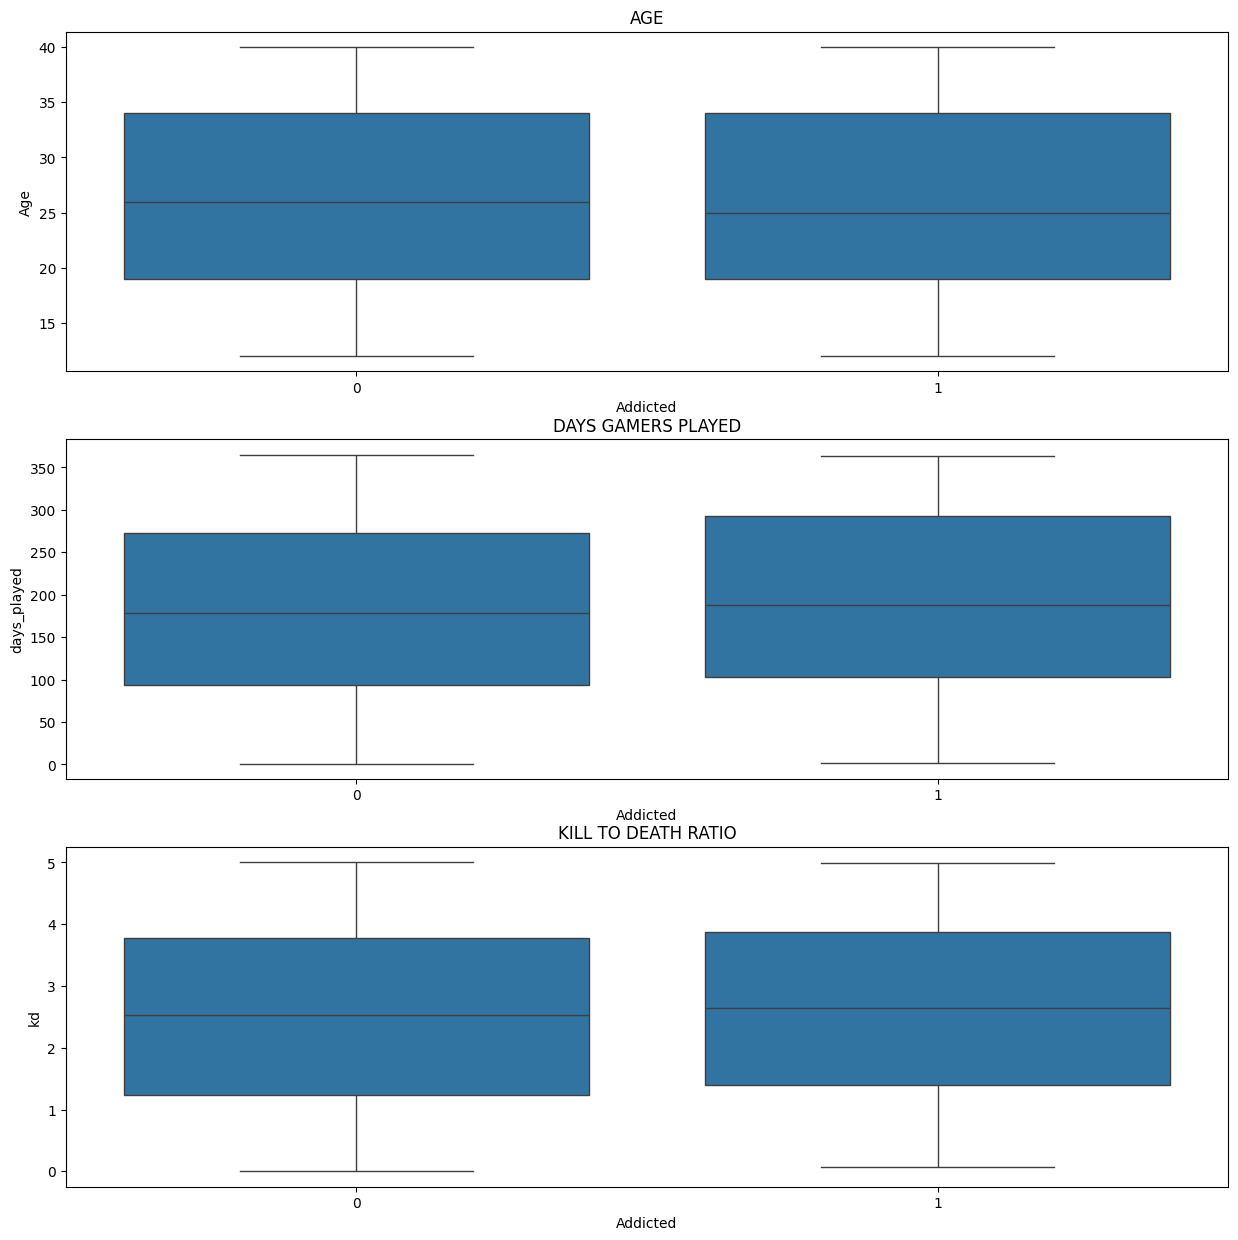

In [36]:
# let's plot the boxplot for all numeric continous columns w.r.t target feature
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.boxplot(x=data['Addicted'],y=data['Age'],data=data)
plt.title('AGE')

plt.subplot(3,1,2)
sns.boxplot(x=data['Addicted'],y=data['days_played'],data=data)
plt.title('DAYS GAMERS PLAYED')

plt.subplot(3,1,3)
sns.boxplot(x=data['Addicted'],y=data['kd'],data=data)
plt.title('KILL TO DEATH RATIO')


Text(0.5, 1.0, 'Correlation Plot of All Features')

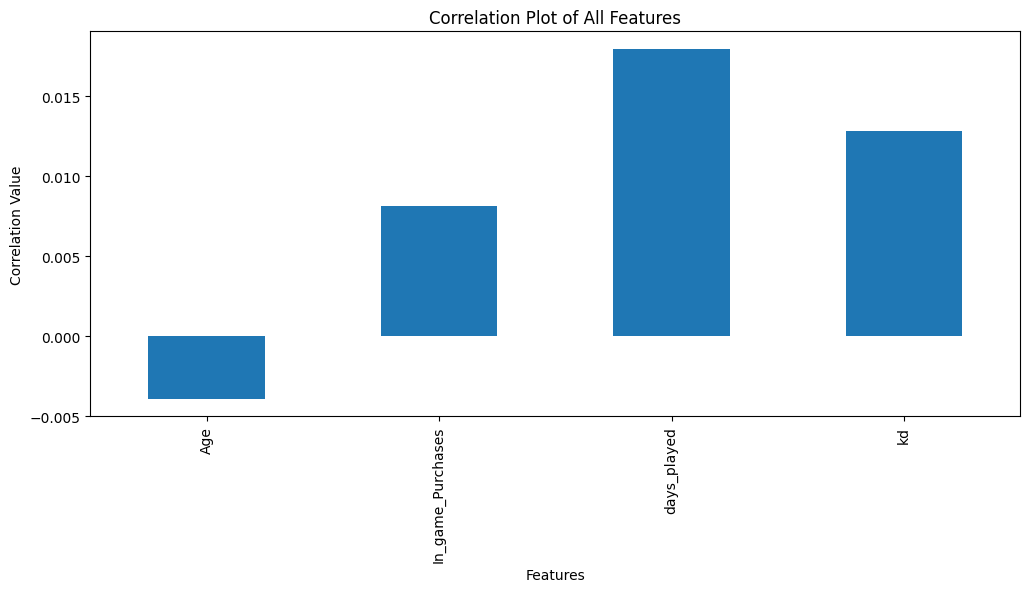

In [37]:
# checking all the features correlation w.r.t target variable

# adjust the size of the plot
plt.figure(figsize=(12,5))

# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])

# plot correlation
numeric_data.corr()['Addicted'][:-1].plot(kind='bar')

# create a 'x label'
plt.xlabel('Features')

# create a 'y label'
plt.ylabel('Correlation Value')

# create a title for the plot
plt.title('Correlation Plot of All Features')


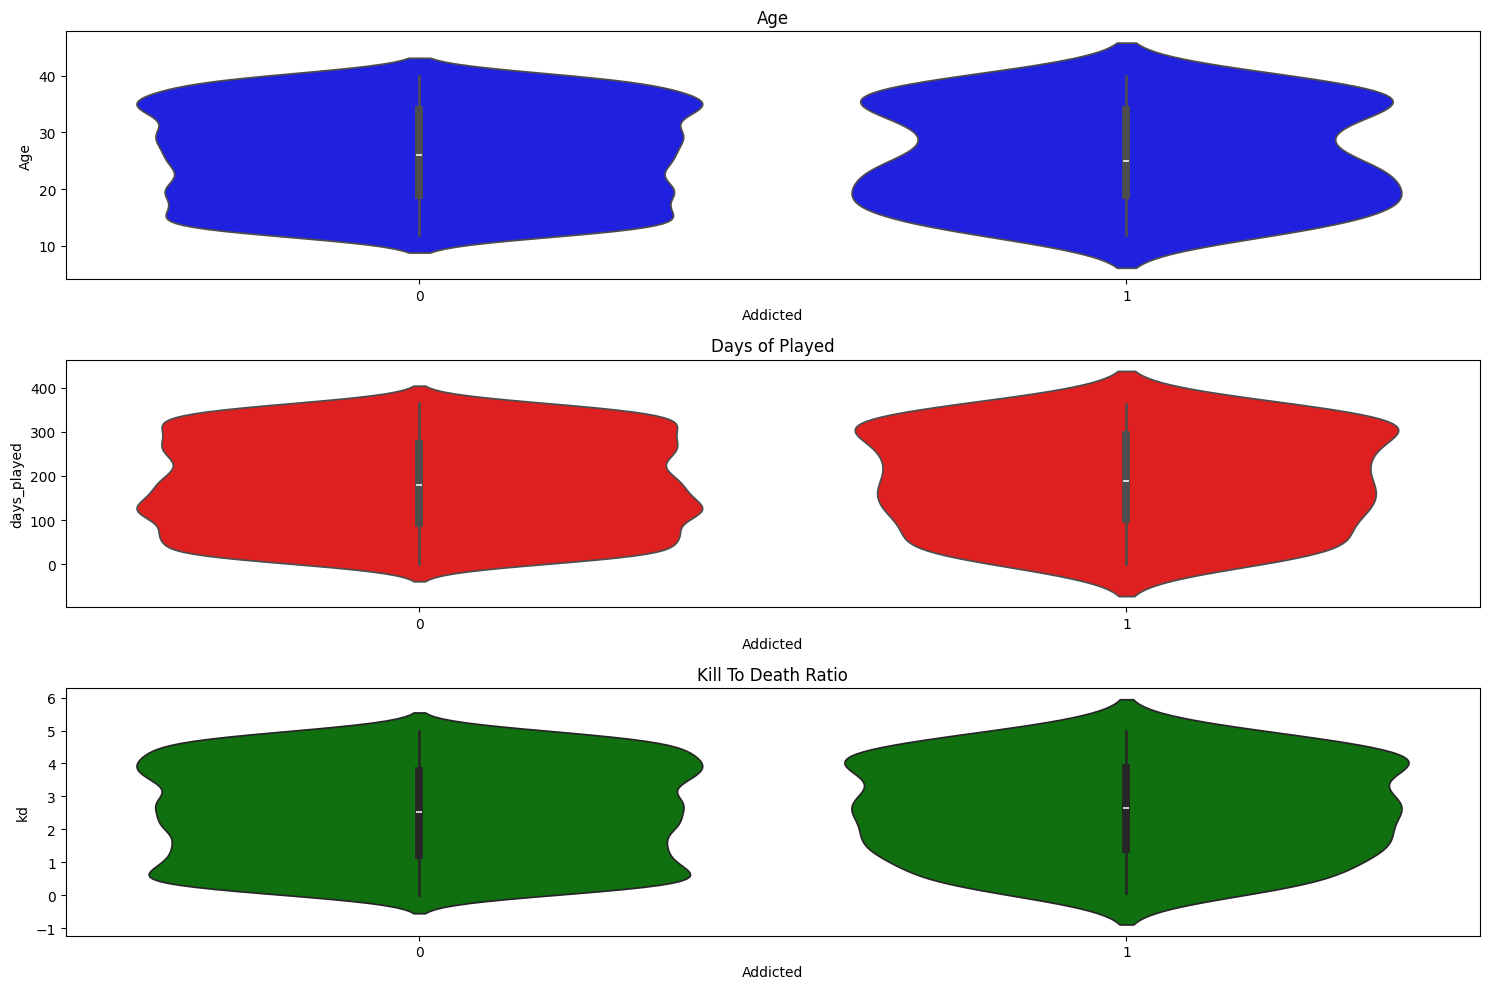

In [38]:
# let's plot the violinplot for all numeric continous columns w.r.t target feature
plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
sns.violinplot(x=data['Addicted'],y=data['Age'],data=data,color='blue')
plt.title('Age')

plt.subplot(3,1,2)
sns.violinplot(x=data['Addicted'],y=data['days_played'],data=data,color='Red')
plt.title('Days of Played')

plt.subplot(3,1,3)
sns.violinplot(x=data['Addicted'],y=data['kd'],data=data,color='green')
plt.title('Kill To Death Ratio')

plt.tight_layout()

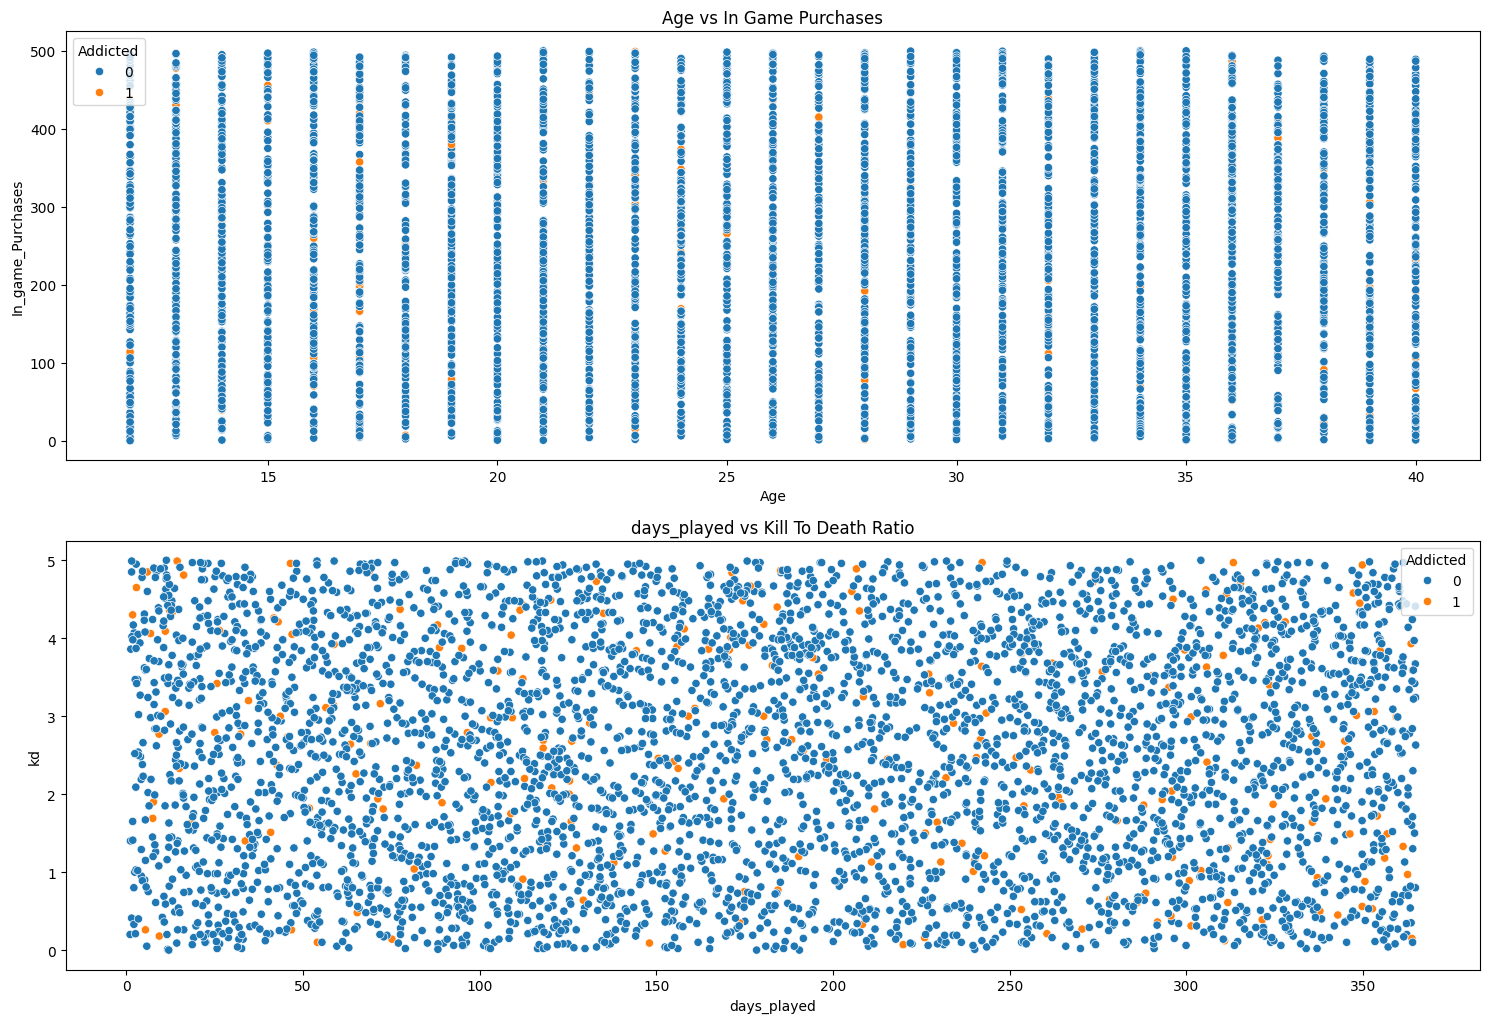

In [39]:
# check the relation between 'Age' vs 'In Game Purchases' and 'Kill ratio' vs 'Days of Played' with scatterplot
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(x=data['Age'],y=data['In_game_Purchases'],hue='Addicted',data=data)
plt.title('Age vs In Game Purchases')

plt.subplot(3,1,2)
sns.scatterplot(x=data['days_played'],y=data['kd'],hue='Addicted',data=data)
plt.title('days_played vs Kill To Death Ratio')

plt.tight_layout()

**Multi Variate Analysis**


Multivariate analysis examines the relationships between three or more variables simultaneously, helping to uncover deeper patterns, interactions, or hidden structures in the data.



**with label encoding:**


Label encoding is used to convert categorical variables into numerical values for easier processing in machine learning models, especially when performing multivariate analysis

In [40]:
# import sklearn function 'LabelEncoder' for converting categorical values into numberic
from sklearn.preprocessing import LabelEncoder

# make a variable for LabelEncoder function
label_encoder = LabelEncoder()

In [41]:
# label encoding of 'Occupation' column in dataframe
data['Occupation'] = label_encoder.fit_transform(data['Occupation'])

In [42]:
# label encoding of 'Tire Status' column in dataframe
data['Tire_state'] = label_encoder.fit_transform(data['Tire_state'])

In [43]:
# let's us take a look that our features encoded or not
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4373 entries, 0 to 5109
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                4373 non-null   int64  
 1   Occupation         4373 non-null   int64  
 2   In_game_Purchases  4373 non-null   float64
 3   days_played        4373 non-null   float64
 4   kd                 4373 non-null   float64
 5   Tire_state         4373 non-null   int64  
 6   Addicted           4373 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 273.3 KB


**Heatmap**

A heatmap is a graphical representation of data where individual values are represented as colors. When applied to a correlation matrix, it helps visualize how variables in your dataset are related to each other.

Text(0.5, 1.0, 'Heatmap of Dataframe')

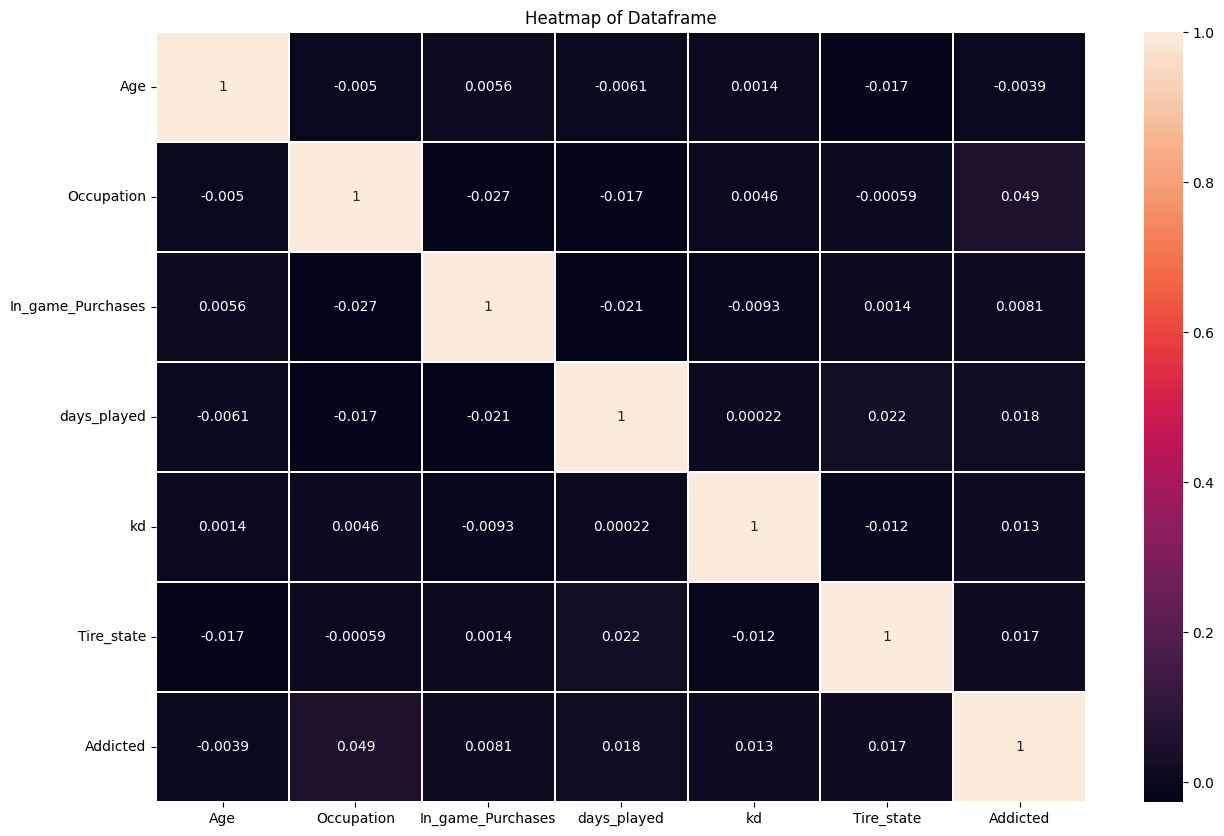

In [44]:
# create a heapmap to visualize the correlation between all features

# adjust the size of heatmap
plt.figure(figsize=(15,10))

# create a variable for correlation
data_corr = data.corr()

# plot heatmap
sns.heatmap(data_corr,annot=True,linecolor='white',linewidths=0.2)

# set a title
plt.title('Heatmap of Dataframe')

Text(0.5, 1.0, 'Correlation Plot of All Features')

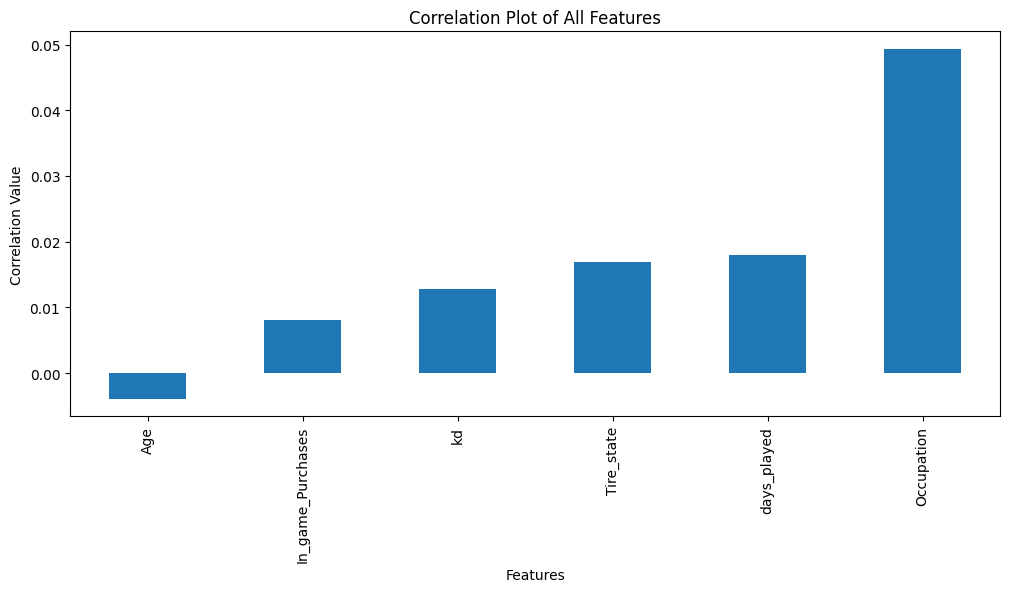

In [45]:
# checking all the features correlation w.r.t target variable

# adjust the size of the plot
plt.figure(figsize=(12,5))

# plot correlation
data.corr()['Addicted'][:-1].sort_values().plot(kind='bar')

# create a 'x label'
plt.xlabel('Features')

# create a 'y label'
plt.ylabel('Correlation Value')

# create a title for the plot
plt.title('Correlation Plot of All Features')

**Machine Learning Model:**

> In your gaming addiction detection project, machine learning models can help predict or classify players' addiction levels based on various features like gaming hours, occupation, age, and other behavioral data.



In [46]:
#Data Splitting & Scaling:
from sklearn.model_selection import train_test_split
#Splits your dataset into training and testing sets to evaluate model performance.

from sklearn.preprocessing import MinMaxScaler
# #Scales features to a range (usually 0 to 1),ensuring that all features have the same scale, which is important for models like KNN and SVM.

#Model Evaluation:
from sklearn.metrics import classification_report,confusion_matrix
#classification_report: Displays precision, recall, F1-score, and support for each class in classification tasks.
#confusion_matrix: A matrix to show the number of correct and incorrect predictions for each class.

from sklearn.metrics import accuracy_score,log_loss
#accuracy_score: Calculates the percentage of correct predictions.
#log_loss: Measures the performance of a classification model with probability outputs.

from sklearn.metrics import roc_auc_score,roc_curve
#roc_auc_score: Evaluates classification performance using the ROC (Receiver Operating Characteristic) curve's area under the curve (AUC).
#roc_curve: Generates the ROC curve data for binary classification problems.

#Machine Learning Algorithms:
from sklearn.linear_model import LogisticRegression
#LogisticRegression: A linear model for binary classification that estimates probabilities using a logistic function.

from sklearn.tree import DecisionTreeClassifier
#DecisionTreeClassifier: A tree-based model that splits data based on feature thresholds to classify outcomes.

from sklearn.ensemble import RandomForestClassifier
#RandomForestClassifier: An ensemble model that uses multiple decision trees to improve classification performance and robustness.

from sklearn.svm import SVC
#SVC: Support Vector Classifier, which aims to find the optimal boundary that separates different classes.

from sklearn.naive_bayes import MultinomialNB
#MultinomialNB: Naive Bayes classifier for multinomially distributed data, typically used for text classification.

from sklearn.neighbors import KNeighborsClassifier
#KNeighborsClassifier: Classifies a data point based on the 'k' nearest neighbors in the feature space.

#Model Tuning & Validation:
from sklearn.model_selection import GridSearchCV
#GridSearchCV: Performs an exhaustive search over specified hyperparameter values for a model to find the best combination.

from sklearn.model_selection import cross_val_score
#cross_val_score: Evaluates a model using cross-validation to ensure robustness and avoid overfitting.

#Serialization:
import pickle
#pickle: Used to save and load your trained models to disk for future use without retraining.

In [47]:
# splitting data into dependent and independent variables
# independent variable
y = data['Addicted']
data.drop('Addicted',axis=1, inplace= True)
X=data #This assigns the modified DataFrame (without the "Addicted" column) to X, which now contains all the features used for prediction.
# print(X.head())
# dependent variable

In [48]:
X=pd.DataFrame(X) #converts the feature set X into a pandas DataFrame.

In [49]:
X.isnull().sum() #checking null value

,0
Age,0
Occupation,0
In_game_Purchases,0
days_played,0
kd,0
Tire_state,0


In [50]:
# splitting data into training and test data x means test and y means target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
# shape of all training and testing data variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3061, 6), (1312, 6), (3061,), (1312,))

**Scaling Train and Test Data**

> To scale both the training and test data, you can use MinMaxScaler (or other scalers like StandardScaler) from sklearn. Scaling is important to ensure that all features are on the same scale, which benefits models like KNN, SVM, and Logistic Regression.

In [52]:
# make a variable for 'MinMaxScale' function
scaler = MinMaxScaler()

# scaling training data variable
X_train = scaler.fit_transform(X_train)

# scaling testing data variable
X_test = scaler.transform(X_test)
X_test

array([[0.21428571, 0.5       , 0.62595328, 0.68363306, 0.172     ,
        1.        ],
       [0.28571429, 1.        , 0.78017975, 0.59132156, 0.044     ,
        0.        ],
       [0.75      , 1.        , 0.43201425, 0.9046637 , 0.036     ,
        1.        ],
       ...,
       [0.17857143, 0.        , 0.279269  , 0.36509377, 0.188     ,
        0.        ],
       [0.82142857, 1.        , 0.0236594 , 0.10212836, 0.688     ,
        0.        ],
       [0.        , 0.        , 0.57264957, 0.80083045, 0.324     ,
        0.        ]])

## **machine learning algorithms:**


**1. Logistic Regression :**
A statistical method for binary classification that predicts the probability of an outcome using a logistic function.

**2. Decision Tree :**
A model that splits data into branches based on feature values, creating a tree-like structure to make decisions for classification or regression.

**3. Random Forest:**
An ensemble learning method that constructs multiple decision trees and merges their results to improve classification accuracy and control overfitting.

**4. Support Vector Classifier (SVC):**
A classification method that finds the hyperplane that best separates different classes in the feature space, maximizing the margin between them.

**5. Naive Bayes:**
A probabilistic classifier based on Bayes' theorem, assuming independence between features, commonly used for text classification and spam detection.

**6. K-Nearest Neighbors (KNN):**
A non-parametric classification algorithm that assigns a class to a data point based on the majority class among its 'k' closest neighbors in feature space.



 **making an object for all machine-learning algorithms**

In [53]:
# making an object for all machine-learning algorithms
lr = LogisticRegression()
dtree = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=200)
svm = SVC()
knn = KNeighborsClassifier(n_neighbors=5)
nb = MultinomialNB()

In [54]:
ml_names = ['Logistic Reg.','Decision Tree','Random Forest','SVM','K Nearest Neighbor','Naive Bayes']
ml_object = ['lr','dtree','rfc','svm','knn','nb']
list(zip(ml_names,ml_object))

#Purpose:This list of tuples is useful for keeping track of the machine learning algorithms and their associated object names in a structured manner.

[('Logistic Reg.', 'lr'),
 ('Decision Tree', 'dtree'),
 ('Random Forest', 'rfc'),
 ('SVM', 'svm'),
 ('K Nearest Neighbor', 'knn'),
 ('Naive Bayes', 'nb')]

In [55]:
# making a list of all used ml algorithms
ml_names = ['Logistic Reg.','Decision Tree','Random Forest','SVM','K Nearest Neighbor',
           'Naive Bayes']

# making a list of all used ml algorithms object
ml_object = [lr,dtree,rfc,svm,knn,nb]

# using for loop to check the accuracy for all algorithms
print('Accuracy of all Algorithms\n')
# using both lists in our loop
for i,j in zip(ml_names,ml_object):

    # training our all algorithms
    j.fit(X_train,y_train)

    # make predictions for all algorithms with the help of test data
    pred = j.predict(X_test)

    # printing accuracy for all algorithms
    print(f'{i} : {accuracy_score(y_test,pred)*100:.2f}%\n')

Accuracy of all Algorithms

Logistic Reg. : 94.97%

Decision Tree : 90.62%

Random Forest : 94.89%

SVM : 94.97%

K Nearest Neighbor : 93.90%

Naive Bayes : 94.97%



In [56]:
# making a list of all used ml algorithms
ml_names = ['Logistic Reg.','Decision Tree','Random Forest','SVM','K Nearest Neighbor',
           'Naive Bayes']

# making a list of all used ml algorithms object
ml_object = [lr,dtree,rfc,svm,knn,nb]

# using for loop to check the log loss for all algorithms
print('Log Loss of all Algorithms\n')
# using both lists in our loop
for i,j in zip(ml_names,ml_object):

    # training our all algorithms
    j.fit(X_train,y_train)

    # make predictions for all algorithms with the help of test data
    pred = j.predict(X_test)

    # printing log loss for all algorithms
    print(f'{i} : {log_loss(y_test,pred):.2f}\n')

Log Loss of all Algorithms

Logistic Reg. : 1.81

Decision Tree : 3.32

Random Forest : 1.81

SVM : 1.81

K Nearest Neighbor : 2.20

Naive Bayes : 1.81



**Decision Tree**

In [57]:
# Define a dictionary of hyperparameters and their possible values
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [10, 20, 30],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum samples required to be at a leaf node
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_dtree_model = grid_search.best_estimator_

# Make predictions with the best model
dtree_pred = best_dtree_model.predict(X_test)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


**confusion matrix:**
A confusion matrix is a performance measurement tool for classification problems that helps visualize the performance of a machine learning model.


> True Positive (TP): The number of positive instances correctly predicted as positive.

> True Negative (TN): The number of negative instances correctly predicted as negative.

> False Positive (FP): The number of negative instances incorrectly predicted as positive (Type I error).

> False Negative (FN): The number of positive instances incorrectly predicted as negative (Type II error).


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

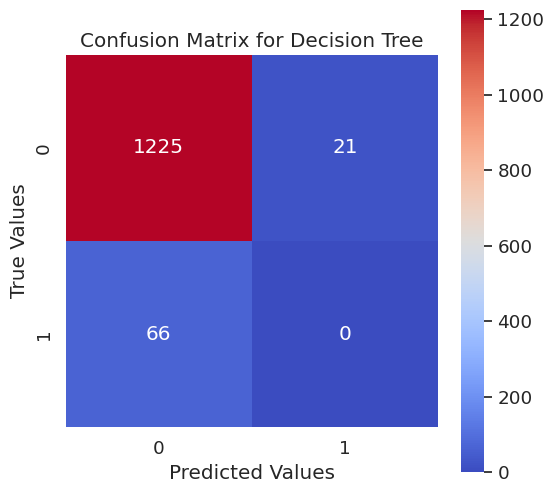

In [58]:
# making confusion matrix
cm = confusion_matrix(y_test,dtree_pred)

# adjust the size of the confusion matrix
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)

# create a heatmap which show the confusion matrix of the decision tree model
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', square=True,xticklabels=['0', '1'],
            yticklabels=['0', '1'])

plt.xlabel('Predicted Values') # x label of the confusion matrix
plt.ylabel('True Values') # y label of the confusion matrix
plt.title('Confusion Matrix for Decision Tree') # title of the confusion matrix

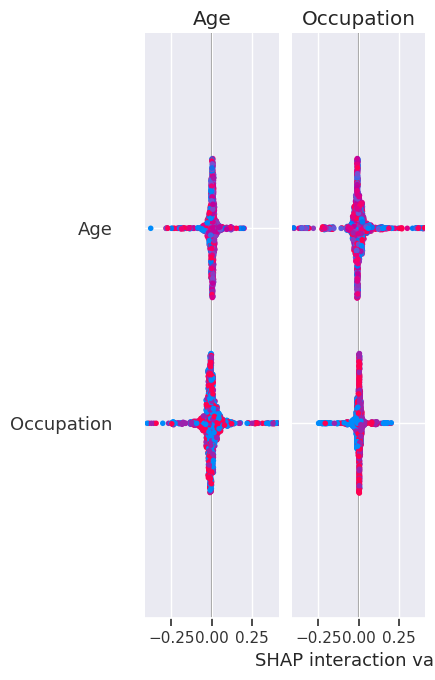

In [59]:
!pip install shap #here importing shap using pip
import shap #importing shap library
# shap plot for the decision tree model
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test,feature_names=X.columns)

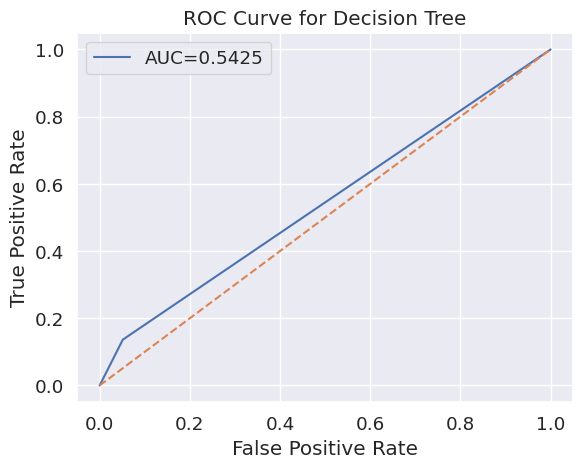

In [60]:
# ROC and AUC score for the decision tree model
dtree_pred_prob = dtree.predict_proba(X_test)[:][:,1]

dtree_actual_predict = pd.concat([pd.DataFrame(np.array(y_test),columns=['y actual']),
                               pd.DataFrame(dtree_pred_prob,columns=['y pred prob'])],axis=1)
dtree_actual_predict.index = y_test.index

fpr, tpr, tr = roc_curve(dtree_actual_predict['y actual'],dtree_actual_predict['y pred prob'])
auc = roc_auc_score(dtree_actual_predict['y actual'],dtree_actual_predict['y pred prob'])

plt.plot(fpr,tpr, label='AUC=%.4f'%auc)
plt.plot(fpr,fpr,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend()

In [61]:
import pickle

In [62]:
data.head()

,Age,Occupation,In_game_Purchases,days_played,kd,Tire_state
0,29,2,456.10,24.99,2.79,2
1,37,0,437.27,92.29,3.46,0
2,28,1,77.46,263.78,1.96,1
3,34,1,449.08,345.13,1.48,2
4,34,0,313.92,198.21,2.45,1
